In [1]:
from xml.etree.ElementInclude import include
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

In [3]:
df4 = pd.read_csv('../test/out4_nt_e+.csv', header = 7, names = ['Energy [MeV]', 'Traverse Width [mm]', 'Angle [rad]', 'Rotational Angle [rad]']).to_numpy()
p4 = pd.read_csv('../test/out4_nt_M4V.csv', header = 8, names = ['Px', 'Py', 'Pz', 'E [MeV]', 'Minkowski Norm']).to_numpy()

In [36]:
def expectationValue2(x):
        return np.mean(np.square(x)) - np.square(np.mean(x))

In [49]:
E = df4[:,0]
ib = E > 20

TW = df4[ib,1]
R = df4[ib,3]
pX = p4[ib,0]
pY = p4[ib,1]
pZ = p4[ib,2]
pE = p4[ib,3]
E0 = .511

In [50]:
x = np.multiply(TW, np.cos(R))
X2 = expectationValue2(x)
pX2 = expectationValue2(pX)
XpX = np.mean(np.multiply(x, pX)) - np.mean(x) * np.mean(pX)
# print(X2, pX2, XpX)
emittance = 1 / E0 * np.sqrt(X2 * pX2 - XpX ** 2)
print(f'Emittance : {emittance}')

Emittance : 28.448478109877275


In [44]:
npX2 = np.var(x)

In [46]:
print(npX2, X2)

16.6583517543175 16.6583517543175


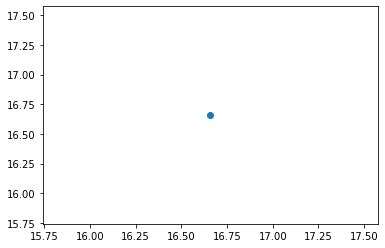

In [45]:
plt.scatter(npX2, X2)
plt.show()

In [5]:
p4

array([[-5.39562e+00, -8.58890e+00,  1.79162e+01,  2.05945e+01,
         5.10999e-01],
       [ 3.22778e+01, -1.41866e+01,  5.17349e+02,  5.18550e+02,
         5.10999e-01],
       [ 1.10796e+00,  9.35299e+00,  2.83209e+01,  2.98503e+01,
         5.10999e-01],
       ...,
       [-1.37327e+00, -1.69918e+00,  2.69874e+00,  3.50962e+00,
         5.10999e-01],
       [ 4.75062e+00,  2.77110e+00,  4.26988e+01,  4.30546e+01,
         5.10999e-01],
       [ 2.59836e+00, -3.82051e+00,  7.17971e+01,  7.19475e+01,
         5.10999e-01]])

(array([    0.,     0.,     0.,     0.,     0., 98052.,     0.,     0.,
            0.,     0.]),
 array([0.010999, 0.110999, 0.210999, 0.310999, 0.410999, 0.510999,
        0.610999, 0.710999, 0.810999, 0.910999, 1.010999]),
 <BarContainer object of 10 artists>)

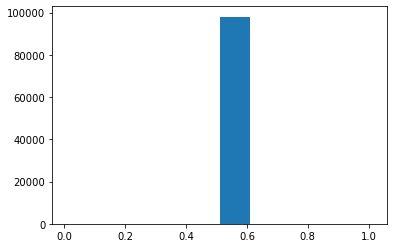

In [6]:
plt.hist(p4[:, 4])

In [15]:
var = np.sqrt(p4[:, 3]**2 - (p4[:,0]**2+p4[:,1]**2+p4[:,2]**2))

/var/folders/l9/q33h82k16xx50gmpcg10_ymh0000gn/T/ipykernel_47907/2709805655.py:1: RuntimeWarning: invalid value encountered in sqrt
  var = np.sqrt(p4[:, 3]**2 - (p4[:,0]**2+p4[:,1]**2+p4[:,2]**2))


In [25]:
np.argmax(var)

9

In [28]:
idx = np.argsort(var)
print(idx)

[74088 59439 30813 ... 29837 29709 39213]


In [32]:
print(var[74088])
print(var[39213])

0.0063504158037119085
nan


In [31]:
print(p4[74088,:])
print(p4[39213,:])

[-3.78767e+00 -2.72442e-01  8.01146e+02  8.01155e+02  5.10999e-01]
[ 5.52180e+00 -1.56725e+01  1.25366e+03  1.25377e+03  5.10999e-01]


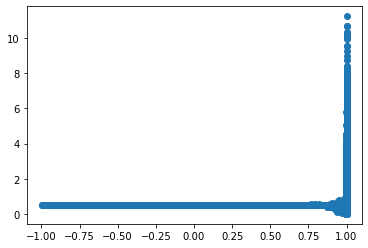

In [34]:
plt.scatter(np.divide(p4[:,2],p4[:,3]), var)
plt.show()

In [20]:
p4[9,:]

array([  0.373013,  -1.64314 , 234.517   , 234.523   ,   0.510999])

In [26]:
np.sqrt(p4[9,0]**2+p4[9,1]**2+p4[9,2]**2)

234.52305288981245

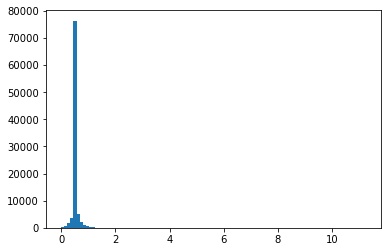

In [21]:
plt.hist(var, bins = 100)
plt.show()